<a href="https://colab.research.google.com/github/muditagarg99/Telco-customer-churn-prediction/blob/main/Copy_of_Assignment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/Colab Notebooks/Machine_learning/Logistic_regression/Copy of WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df=pd.read_csv(path)

In [5]:
print('dataset size, ROWS: ', df.shape[0], 'and COLUMNS: ', df.shape[1])

dataset size, ROWS:  7043 and COLUMNS:  21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [9]:
# Make the copy of the original dataset to make changes
dff= df.copy()

In [19]:
dff[dff['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
dff.loc[488,'TotalCharges']

' '

In [40]:
a=eval(dff.loc[0,'TotalCharges'])
a

12

There is nor missing value in any of the column. 

But the categorical columns need to be changed to integer values.

Plot histogram for each column

In [41]:
cat_col=df.describe(include='all').columns

In [42]:
cat_col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dff['customerID'].nunique()

7043

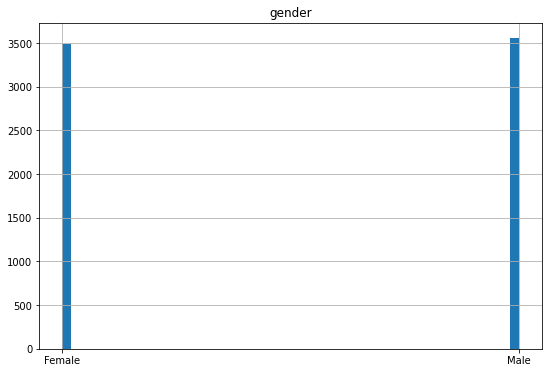

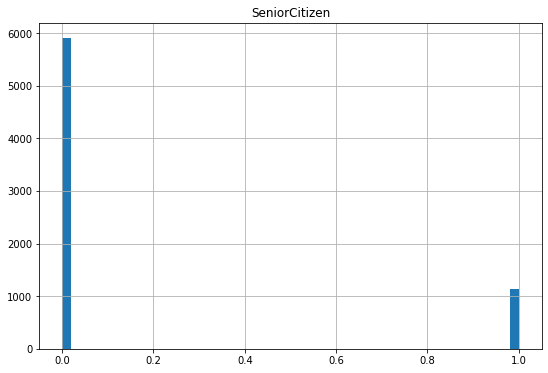

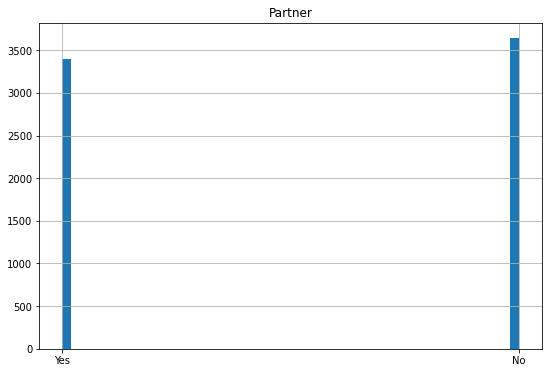

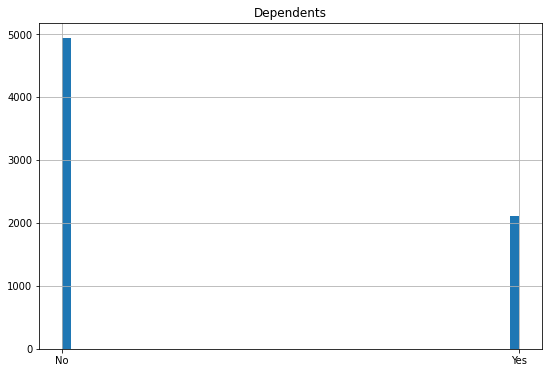

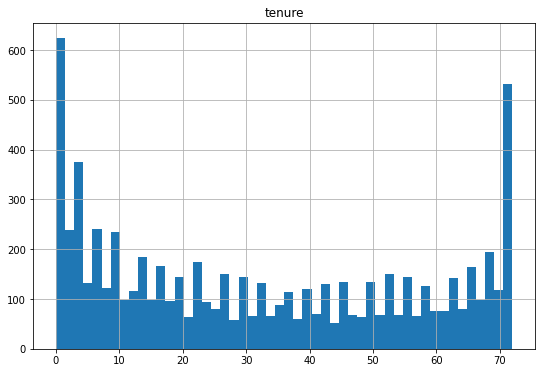

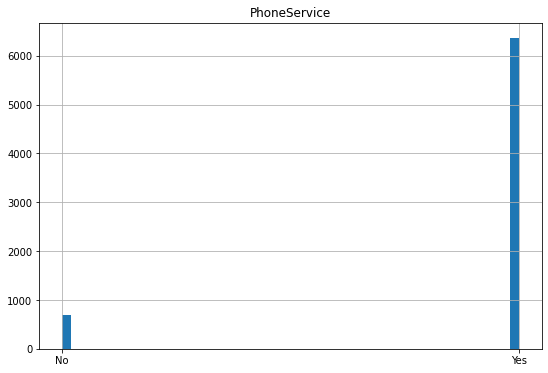

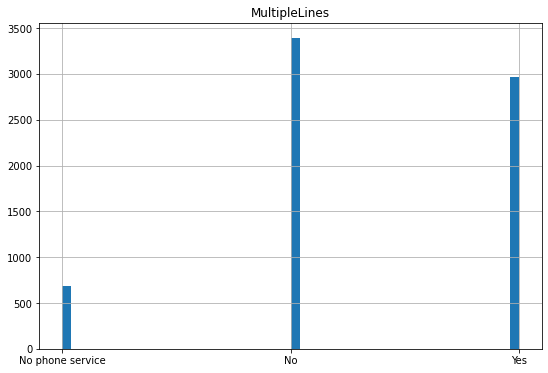

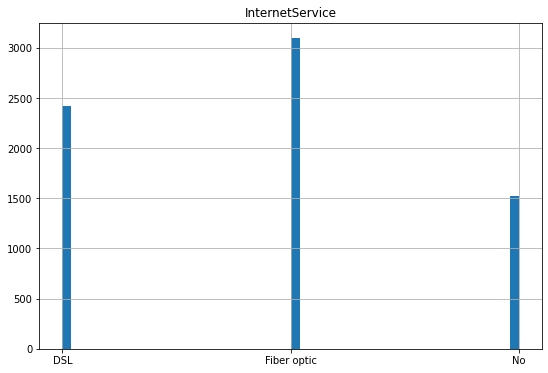

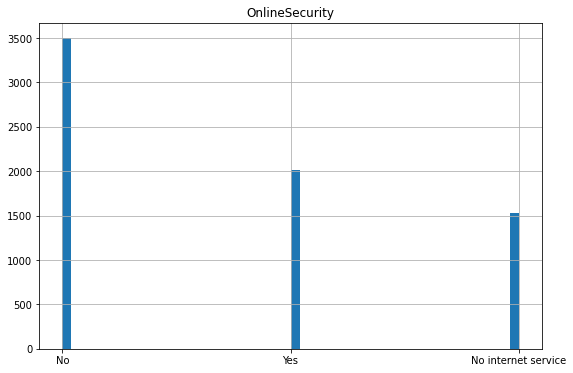

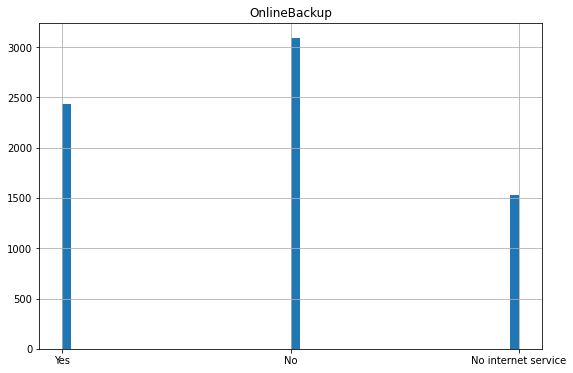

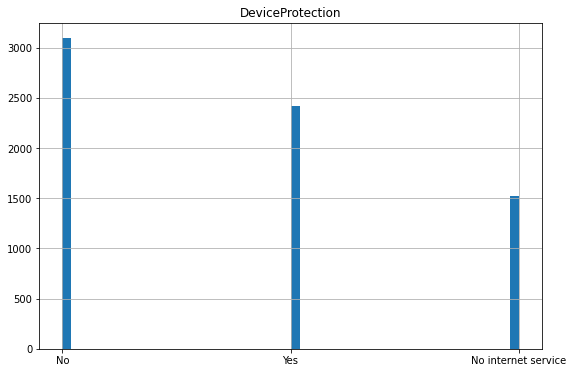

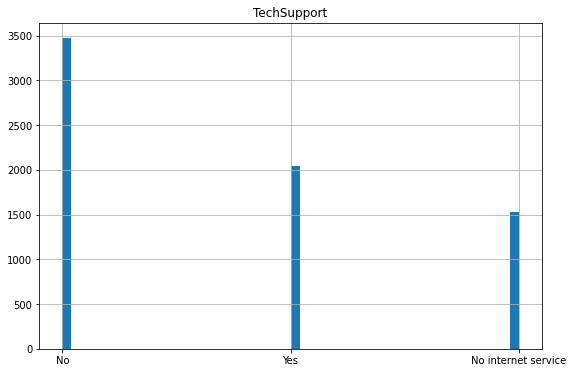

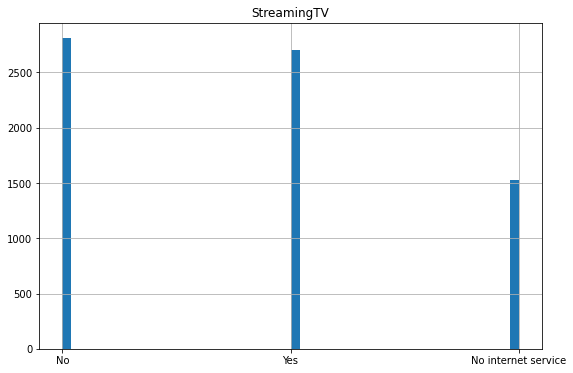

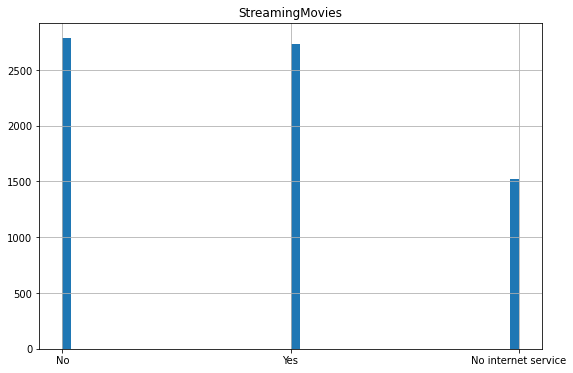

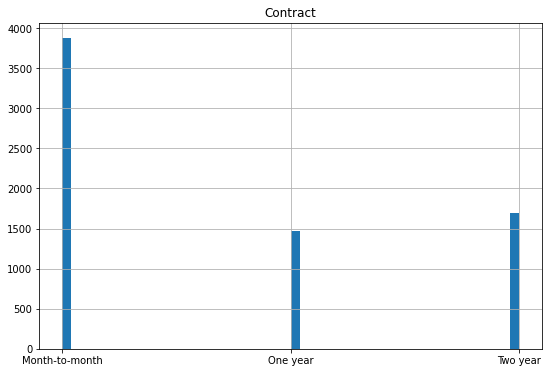

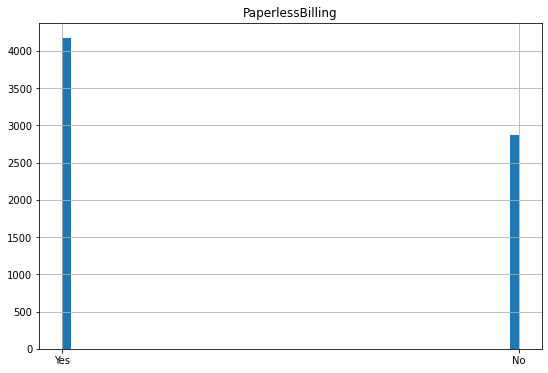

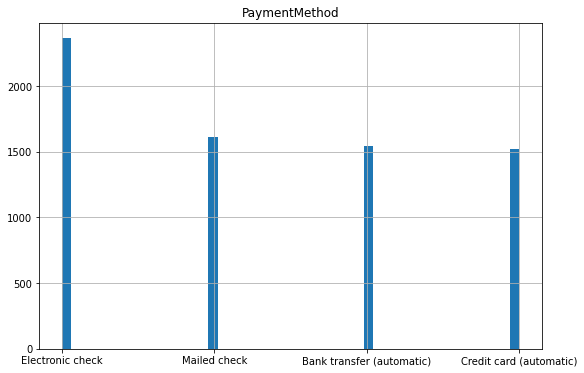

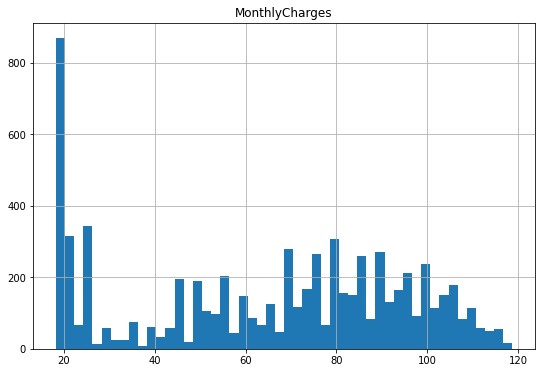

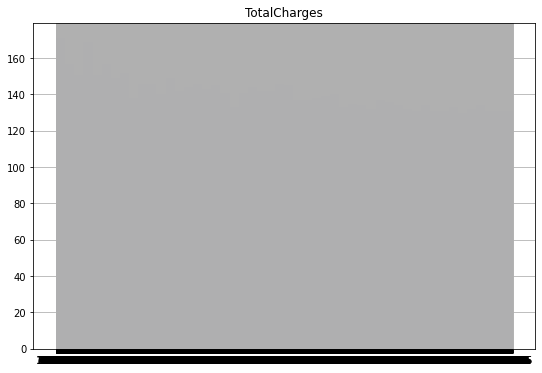

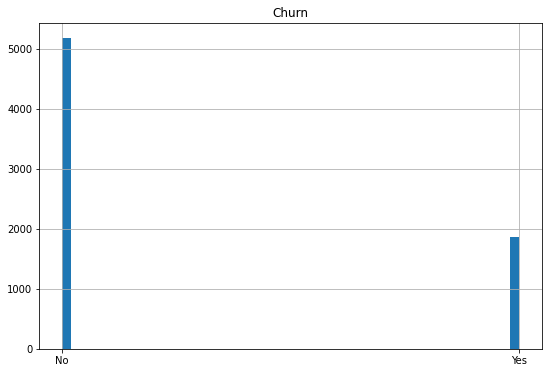

In [ ]:
for col in cat_col[1:]:
  fig= plt.figure(figsize=(9,6))
  ax= fig.gca()
  feature= dff[col]
  feature.hist(bins=50,ax=ax)
  plt.title(col)

plt.show()

In [43]:
# replacing the empty cell of total charges with 0
for i, row in dff.iterrows():
  if row['TotalCharges']==' ':
    dff.loc[i,'TotalCharges']='0'
    print(i)

In [44]:
dff['TotalCharges']=dff['TotalCharges'].apply(lambda x:eval(x))

In [45]:
dff.gender= dff.gender.apply(lambda x:0 if x=='Female' else 1)

In [46]:
dff.Partner= dff.Partner.apply(lambda x: 0 if x=='No' else 1)

In [47]:
dff.Dependents = dff.Dependents.apply(lambda x: 0 if x=='No' else 1)

In [48]:
dff.PhoneService = dff.PhoneService.apply(lambda x: 0 if x=='Yes' else 1)

In [49]:
dff.MultipleLines= dff.MultipleLines.apply(lambda x: 0 if x=='No' else 1)

In [50]:
dff.InternetService= dff.InternetService.apply(lambda x: 0 if x=='No' else 1)

In [51]:
dff.OnlineSecurity= dff.OnlineSecurity.apply(lambda x: 1 if x=='Yes' else 0)

In [52]:
dff.DeviceProtection= dff.DeviceProtection.apply(lambda x: 1 if x=='Yes' else 0)

In [53]:
dff.TechSupport= dff.TechSupport.apply(lambda x: 1 if x=='Yes' else 0)

In [54]:
dff.StreamingTV= dff.StreamingTV.apply(lambda x: 1 if x=='Yes' else 0)

In [55]:
dff.StreamingMovies= dff.StreamingMovies.apply(lambda x: 1 if x=='Yes' else 0)

In [56]:
dff['InternetService'] = dff[['InternetService','StreamingMovies', 'StreamingTV', 'OnlineSecurity', 'TechSupport','OnlineBackup', 'DeviceProtection']].sum(axis=1)

<ipython-input-56-722a694d9b45>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dff['InternetService'] = dff[['InternetService','StreamingMovies', 'StreamingTV', 'OnlineSecurity', 'TechSupport','OnlineBackup', 'DeviceProtection']].sum(axis=1)


People who dont have internet connection also dont have these facilities: ['StreamingMovies','StreamingTV', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection']
So we can add all these colums in the internet service column

In [58]:
dff['Family'] = dff[['Partner', 'Dependents']].sum(axis=1)

In [59]:
dff.drop(['customerID','StreamingMovies', 'StreamingTV', 'OnlineSecurity','TechSupport','OnlineBackup', 'DeviceProtection','Partner', 'Dependents'],axis=1,inplace=True)

In [60]:
dff.columns

Index(['gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Family'],
      dtype='object')

In [61]:
dff.PaperlessBilling= dff.PaperlessBilling.apply(lambda x: 1 if x=='Yes' else 0)

In [62]:
dff.Churn= dff.Churn.apply(lambda x: 1 if x=='Yes' else 0)

In [63]:
dff['Contract']= dff.Contract.apply(lambda x:1 if x=='Month-to-month' else (2 if x=='One year' else 0))

In [64]:
dff=pd.get_dummies(dff, columns= ['PaymentMethod'])

In [65]:
dff.columns

Index(['gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Family',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [73]:
df2=dff.copy()

In [76]:
# droping the monthly charges because it is included in Total charges
dff.drop(['MonthlyCharges'],axis=1, inplace=True)

HeatMap

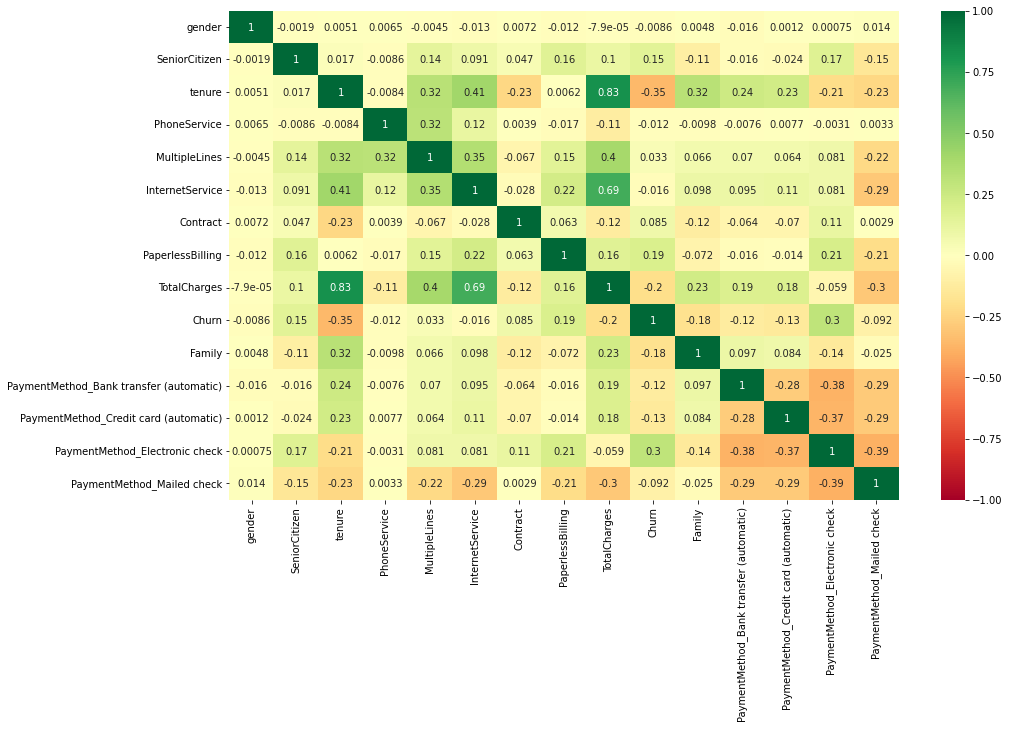

In [77]:
fig=plt.figure(figsize=(15,9))
sns.heatmap(dff.corr(), annot=True,cmap="RdYlGn",vmin=-1,vmax=1)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  vif=pd.DataFrame()
  vif['Fetures']=X.columns
  vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return (vif)

In [79]:
cal_vif(dff[[i for i in dff.describe().columns if i not in ['Churn']]])

,Fetures,VIF
0,gender,1.001072
1,SeniorCitizen,1.084180
2,tenure,4.992358
3,PhoneService,1.425794
4,MultipleLines,1.461908
5,InternetService,2.752154
6,Contract,1.084299
7,PaperlessBilling,1.144552
8,TotalCharges,7.981004
9,Family,1.141365


Now the data is prepared for the application on model.

In [84]:
import numpy as np

In [90]:
X = dff[[i for i in dff.columns if i not in ['Churn']]]
y = dff['Churn']

# Train and test set split

In [95]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2,stratify=y, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5634, 14)
(1409, 14)


In [96]:
y_train.value_counts()

0    4139
1    1495
Name: Churn, dtype: int64

In [97]:
y_test.value_counts()

0    1035
1     374
Name: Churn, dtype: int64

# Model Logistic Regression applied on test and train set

In [98]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Metrices of the Logistic Regression

In [99]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [100]:
train_preds

array([[0.96590326, 0.03409674],
       [0.99621258, 0.00378742],
       [0.8052466 , 0.1947534 ],
       ...,
       [0.89657924, 0.10342076],
       [0.57097   , 0.42903   ],
       [0.65746146, 0.34253854]])

In [101]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

In [103]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7882499112531062
The accuracy on test data is  0.7977288857345636


In [106]:
print('Confusion Matrix on the train set\n', confusion_matrix(train_class_preds,y_train))
print('Confusion Matrix on the test set\n', confusion_matrix(test_class_preds,y_test))

Confusion Matrix on the train set
 [[3777  831]
 [ 362  664]]
Confusion Matrix on the test set
 [[948 198]
 [ 87 176]]


In [108]:
print('Roc-Auc-Score on the train set\n', roc_auc_score(train_class_preds,y_train))
print('Roc-Auc-Score on the test set\n', roc_auc_score(test_class_preds,y_test))

Roc-Auc-Score on the train set
 0.7334174738060428
Roc-Auc-Score on the test set
 0.7482133259012999


In [112]:
print('The train set report \n', classification_report(train_class_preds,y_train))

The train set report 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      4608
           1       0.44      0.65      0.53      1026

    accuracy                           0.79      5634
   macro avg       0.68      0.73      0.70      5634
weighted avg       0.83      0.79      0.80      5634



In [113]:
print('The test set report \n', classification_report(test_class_preds,y_test))

The test set report 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      1146
           1       0.47      0.67      0.55       263

    accuracy                           0.80      1409
   macro avg       0.69      0.75      0.71      1409
weighted avg       0.83      0.80      0.81      1409

